In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from scipy.io import loadmat
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
df = pd.read_csv('wave_number.txt', sep="\t", header=None)

In [2]:
covid = pd.read_csv('raw_COVID.txt', sep="\t", header=None).T
covid.columns = df.iloc[0].values
label=[0]*len(covid)
covid["class"]=label
covid

,400,402,405,407,410,412,415,417,420,422,...,2101,2103,2104,2105,2107,2108,2109,2111,2112,class
0,0.0,-0.012801,-0.023408,-0.023634,-0.021975,-0.020032,-0.016906,-0.019458,-0.017619,-0.015483,...,-0.000801,-0.000076,0.000679,0.001401,0.001727,0.001188,0.001035,0.001292,0.0,0
1,0.0,-0.018025,-0.030653,-0.035458,-0.036650,-0.035226,-0.033281,-0.035165,-0.035045,-0.032368,...,-0.001968,-0.001377,0.000409,0.000793,0.000648,0.000695,0.000532,-0.000512,0.0,0
2,0.0,-0.013673,-0.021870,-0.021575,-0.020910,-0.018225,-0.014659,-0.014754,-0.016441,-0.013255,...,-0.000729,-0.000630,0.000890,0.001635,0.001667,0.001308,0.000759,0.000639,0.0,0
3,0.0,-0.008686,-0.012874,-0.014126,-0.013268,-0.010614,-0.010114,-0.009195,-0.007068,-0.004306,...,-0.001245,-0.000152,0.000436,0.001240,0.001421,0.000911,0.000687,0.000638,0.0,0
4,0.0,-0.007089,-0.011226,-0.010742,-0.009510,-0.006608,-0.004809,-0.003622,-0.001578,0.000452,...,-0.001138,-0.000632,-0.000010,0.000614,0.000693,0.000837,0.000468,0.000104,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,-0.012075,-0.015969,-0.016275,-0.015292,-0.015369,-0.016400,-0.013721,-0.014503,-0.013820,...,-0.000538,0.000050,0.001191,0.001467,0.001823,0.001420,0.001671,0.000966,0.0,0
155,0.0,-0.017376,-0.024656,-0.025636,-0.026982,-0.027625,-0.029134,-0.027138,-0.026919,-0.022834,...,0.000275,0.000287,0.000239,0.000755,0.001314,0.001320,0.000946,0.000392,0.0,0
156,0.0,-0.011666,-0.018976,-0.019419,-0.017430,-0.017057,-0.019041,-0.021120,-0.019771,-0.015616,...,0.001393,0.001246,0.000687,0.001516,0.001923,0.002260,0.001411,0.001238,0.0,0
157,0.0,-0.011431,-0.018292,-0.017184,-0.015339,-0.016573,-0.016317,-0.016650,-0.016017,-0.012436,...,-0.002063,-0.000858,-0.000701,-0.000713,0.000067,0.000204,-0.000403,-0.001296,0.0,0


In [4]:
healthy = pd.read_csv('raw_Helthy.txt', sep="\t", header=None).T
healthy.columns = df.iloc[0].values
label = [1]*len(healthy)
healthy["class"]=label
healthy

,400,402,405,407,410,412,415,417,420,422,...,2101,2103,2104,2105,2107,2108,2109,2111,2112,class
0,0.0,-0.015237,-0.030607,-0.038309,-0.039078,-0.035809,-0.031176,-0.030395,-0.033311,-0.031603,...,-0.000553,0.000118,0.000566,0.001245,0.000846,0.001106,0.001005,0.000117,0.000000e+00,1
1,0.0,-0.012098,-0.028164,-0.035189,-0.036138,-0.031050,-0.026015,-0.027539,-0.028084,-0.027075,...,-0.000998,0.000278,-0.000123,0.000384,0.001010,0.000583,-0.000397,-0.000160,0.000000e+00,1
2,0.0,-0.013000,-0.029058,-0.035021,-0.034994,-0.033025,-0.028413,-0.028470,-0.029737,-0.029198,...,-0.001554,0.000050,0.000866,0.000877,0.000871,0.001093,0.001058,0.000614,0.000000e+00,1
3,0.0,-0.015728,-0.034346,-0.045140,-0.047671,-0.044334,-0.040807,-0.040474,-0.041417,-0.040699,...,-0.001541,-0.000198,0.000202,0.001023,0.000625,0.000420,0.000543,-0.000071,0.000000e+00,1
4,0.0,-0.020355,-0.045839,-0.060556,-0.065805,-0.064988,-0.062097,-0.061955,-0.064759,-0.066886,...,-0.000088,0.000891,0.000942,0.001294,0.001878,0.001739,0.001946,0.001301,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,-0.017505,-0.034112,-0.041859,-0.045220,-0.043174,-0.037520,-0.037029,-0.039483,-0.037047,...,-0.001705,-0.000557,0.000845,0.001883,0.001894,0.001169,0.000479,-0.000266,0.000000e+00,1
146,0.0,-0.021433,-0.048068,-0.061716,-0.063321,-0.062706,-0.059847,-0.059312,-0.062579,-0.063772,...,-0.000679,0.000656,0.000723,0.001857,0.002061,0.001482,0.001536,0.000667,-5.551115e-18,1
147,0.0,-0.007477,-0.019686,-0.023026,-0.022211,-0.019163,-0.014626,-0.012780,-0.013971,-0.013940,...,-0.001036,0.000548,0.000910,0.001574,0.002057,0.002025,0.001242,0.001375,0.000000e+00,1
148,0.0,-0.008270,-0.020397,-0.024946,-0.023074,-0.021405,-0.016653,-0.013458,-0.014452,-0.015669,...,-0.000879,0.000523,0.001087,0.001537,0.001780,0.001770,0.001582,0.000957,0.000000e+00,1


In [7]:
suspected = pd.read_csv('raw_Suspected.txt', sep="\t", header=None).T
suspected.columns = df.iloc[0].values
label = [2]*len(suspected)
suspected["class"]=label
suspected

,400,402,405,407,410,412,415,417,420,422,...,2101,2103,2104,2105,2107,2108,2109,2111,2112,class
0,0.0,-0.004863,-0.015406,-0.022196,-0.022726,-0.019575,-0.014534,-0.013306,-0.014276,-0.012377,...,-0.002975,-0.001567,-0.001282,-0.000020,0.000184,-0.000057,-0.000448,-0.000565,0.0,2
1,0.0,-0.012570,-0.030366,-0.043179,-0.047492,-0.046227,-0.040731,-0.038808,-0.043294,-0.044311,...,-0.001234,-0.000471,0.000411,0.000474,0.000958,0.001064,0.000160,-0.000502,0.0,2
2,0.0,-0.006868,-0.023820,-0.033802,-0.037007,-0.036460,-0.030801,-0.027711,-0.028370,-0.028348,...,-0.001406,-0.000519,0.000336,0.000335,0.001219,0.001850,0.001096,0.000519,0.0,2
3,0.0,-0.011126,-0.025722,-0.035933,-0.040942,-0.040793,-0.036934,-0.033750,-0.035937,-0.037037,...,-0.000449,0.000113,0.000392,0.000801,0.002063,0.001758,0.001447,0.001392,0.0,2
4,0.0,-0.009087,-0.022499,-0.030487,-0.034650,-0.031144,-0.027797,-0.024842,-0.024319,-0.024050,...,-0.001498,0.000193,0.000155,0.000795,0.001269,0.000616,-0.000050,-0.000083,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.0,-0.003650,-0.010987,-0.015336,-0.014502,-0.011631,-0.008229,-0.004386,-0.004346,-0.001869,...,-0.002135,-0.000687,0.000614,0.000642,0.000856,0.000872,0.000533,0.000244,0.0,2
152,0.0,-0.005861,-0.012880,-0.016373,-0.015598,-0.013727,-0.007784,-0.004697,-0.003030,-0.001683,...,-0.002470,-0.000559,0.000501,0.000992,0.001774,0.001699,0.001527,0.000615,0.0,2
153,0.0,-0.003705,-0.011034,-0.014694,-0.013761,-0.012475,-0.008297,-0.003888,-0.001970,0.001550,...,-0.000807,0.000498,0.001506,0.002012,0.002290,0.002201,0.002117,0.001120,0.0,2
154,0.0,-0.001667,-0.005303,-0.006904,-0.005969,-0.003399,0.000702,0.004953,0.006383,0.009112,...,-0.002538,-0.001022,-0.000141,0.000945,0.001373,0.001145,0.000684,0.000411,0.0,2


In [25]:
covid_mean=covid.iloc[:, :-1].mean(axis=0)
healthy_mean=healthy.iloc[:, :-1].mean(axis=0)
suspected_mean=suspected.iloc[:, :-1].mean(axis=0)

In [17]:
frames = [covid, healthy, suspected]
healthy_covid_suspected = pd.concat(frames, ignore_index=True)
healthy_covid=pd.concat([covid, healthy], ignore_index=True)

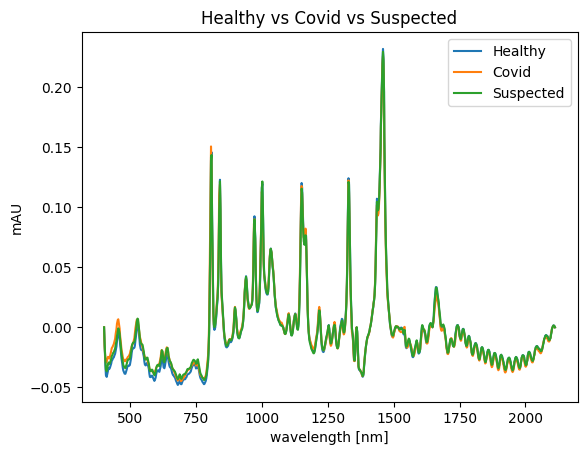

In [107]:
x = df.iloc[0].T.values

plt.plot(x, healthy_mean, label='Healthy')
plt.plot(x, covid_mean, label='Covid')
plt.plot(x, suspected_mean, label='Suspected')

plt.legend()

plt.title("Healthy vs Covid vs Suspected")
plt.xlabel("wavelength [nm]")
plt.ylabel("mAU")

plt.show()

Zrobiono PCA, aby znaleźć kierunki największej wariancji:

In [30]:
healthy_covid_suspected.columns = healthy_covid_suspected.columns.astype(str)
pca = PCA()
X_train_pca = pca.fit_transform(healthy_covid_suspected.iloc[:, :-1])
val_ratio=pca.explained_variance_ratio_
var_exp_cum = np.cumsum(val_ratio)
val_ratio[0]+val_ratio[1]+val_ratio[2]

0.9388625369208997

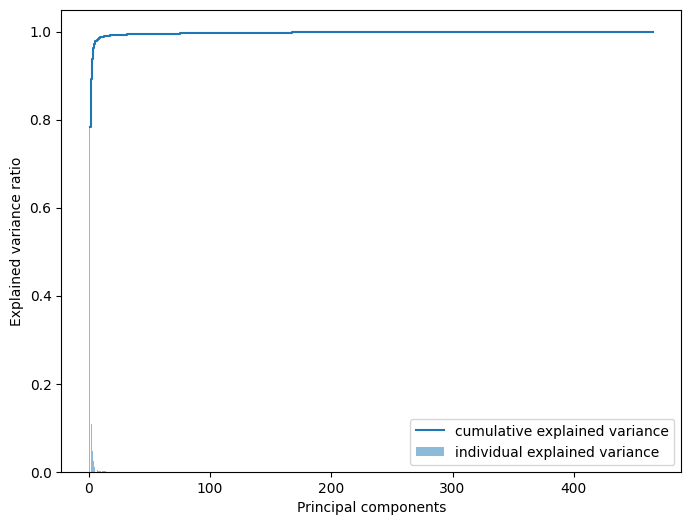

In [31]:
plt.figure(figsize=(8,6))
plt.bar(range(1, 466), val_ratio,     alpha=0.5,   align='center', label='individual explained variance')
plt.step(range(1, 466), var_exp_cum, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [102]:
pca = PCA(n_components=3)  # Wybieram 3 komponenty główne
pca_result_hcs = pca.fit_transform(healthy_covid_suspected.iloc[:, :-1])

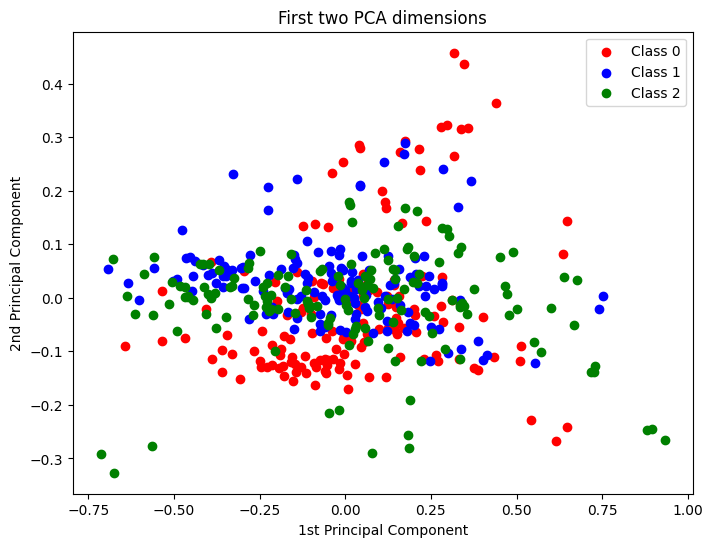

In [103]:
#Wykres korelacji pomiędzy PC1 i PC2:

colors = {0: 'red', 1: 'blue', 2: 'green'}

plt.figure(figsize=(8, 6))

for class_label, color in colors.items():
    subset_indices = np.where(healthy_covid_suspected['class'] == class_label)[0]
    subset_data = pca_result_hcs[subset_indices]
    plt.scatter(
        subset_data[:, 0],
        subset_data[:, 1],
        c=color,
        label=f'Class {class_label}'
    )

plt.title("First two PCA dimensions")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

plt.legend()

plt.show()

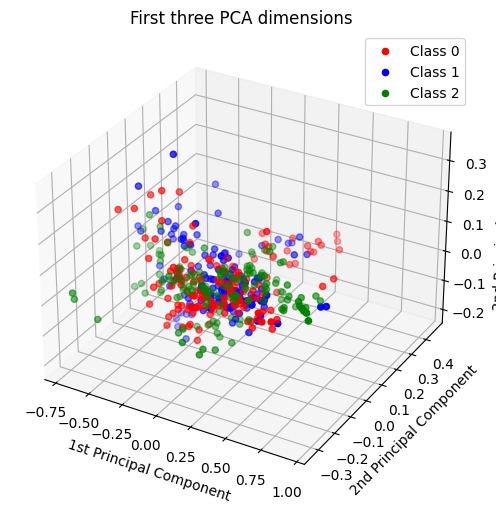

In [106]:
#wykres korelacji pomiędzy PC1, PC2, PC3
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

for class_label, color in colors.items():
    subset_indices = np.where(healthy_covid_suspected['class'] == class_label)[0]
    subset_data = pca_result_hcs[subset_indices]
    ax.scatter3D(
        subset_data[:, 0],
        subset_data[:, 1],
        subset_data[:, 2],
        c=color,
        label=f'Class {class_label}'
    )

plt.title("First three PCA dimensions")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3nd Principal Component")
plt.legend()
plt.show()

In [76]:
#znaleziono najważniejsze cechy dla każdej komponenty PC:

model = PCA(n_components=3)
pca_result_healthy = model.fit_transform(healthy_covid_suspected)
X_pc = model.transform(healthy_covid_suspected)
n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

print("Most important features for each principal component:", most_important)

Most important features for each principal component: [490, 171, 261]


In [95]:
val_490 = healthy_covid_suspected.iloc[0:309, 490]
val_171 = healthy_covid_suspected.iloc[0:309, 171]
val_261 = healthy_covid_suspected.iloc[0:309, 261]
dla_svm = pd.concat([val_490, val_172], axis=1)
dla_svm['class'] = 0  
dla_svm.loc[159:, 'class'] = 1
dla_svm

,1459,804,class
0,0.195838,0.094135,0
1,0.236251,0.131221,0
2,0.183285,0.083831,0
3,0.106867,0.017972,0
4,0.098020,0.015010,0
...,...,...,...
304,0.244935,0.087279,1
305,0.294970,0.127051,1
306,0.176067,0.046465,1
307,0.184527,0.046098,1


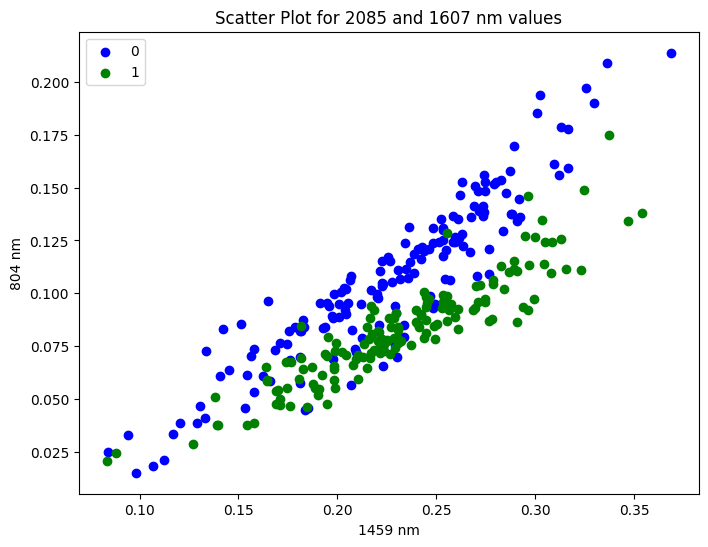

In [96]:
plt.figure(figsize=(8, 6))
color_ranges = [(0, 159), (159, 308)]
colors = ['blue', 'green']

for j, (start, end) in enumerate(color_ranges):
    plt.scatter(
        val_490[start:end+1],
        val_171[start:end+1],
        c=colors[j],
        label=str(j) 
    )

# Add labels and title
plt.xlabel('1459 nm')
plt.ylabel('804 nm')
plt.title('Scatter Plot for 1459 and 804 nm values')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [47]:
from sklearn.svm import SVC
X, X_test, y, y_test = train_test_split(dla_svm.iloc[:, :2], dla_svm.iloc[:, 2:3], shuffle=True, random_state=7, test_size=0.2)
svm = SVC(kernel='rbf', C=100, gamma=10, probability=True, random_state=42)
svm.fit(X, y)

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=10, probability=True, random_state=42)

C:\Users\User\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


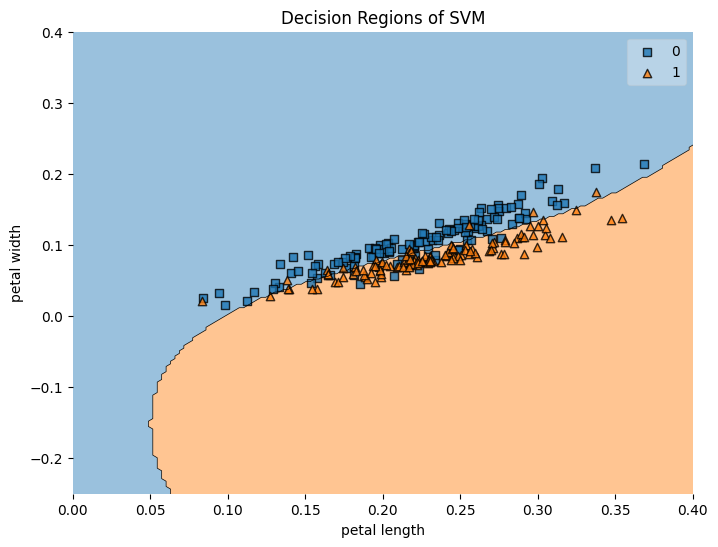

In [48]:
plt.figure(figsize=(8, 6))
from mlxtend.plotting import plot_decision_regions
X_np = X.to_numpy() 
y_np = y.to_numpy().flatten()

plot_decision_regions(X=X_np, y=y_np, clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Decision Regions of SVM')

plt.xlim(0, 0.4)  
plt.ylim(-0.25, 0.4) 

plt.show()

In [49]:
from sklearn.metrics import classification_report
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.85      0.90      0.88        31

    accuracy                           0.87        62
   macro avg       0.87      0.87      0.87        62
weighted avg       0.87      0.87      0.87        62



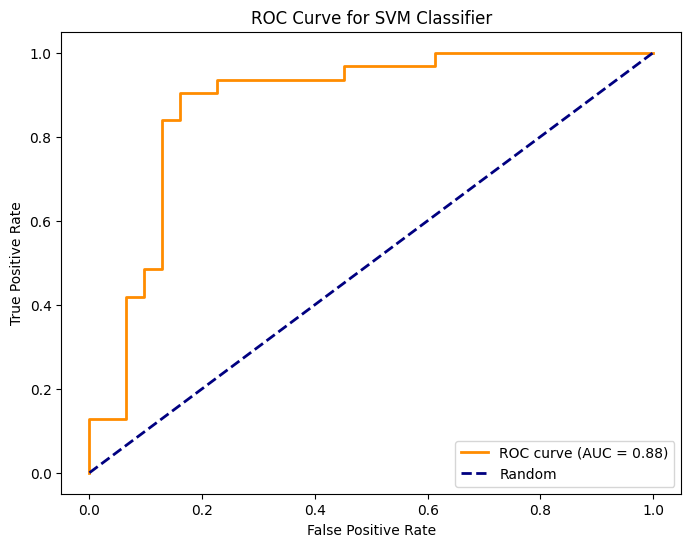

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = svm.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend()
plt.show()


Zastosowano też drzewko decyzyjne do wyodrębnienia najważniejszych cech:

In [52]:
X = healthy_covid.iloc[:, :-1]
y = healthy_covid.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(healthy_covid.iloc[:, :-1], healthy_covid.iloc[:, -1], test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

feature_importances = dt_classifier.feature_importances_

indices = feature_importances.argsort()[::-1]

print("Feature rankings:")
for f in range(X_train.shape[1]):
    print(f"{X.columns[indices[f]]} { indices[f]}: {feature_importances[indices[f]]}")

Feature rankings:
2085 879: 0.5928258967629046
1607 572: 0.07485910055635571
1904 754: 0.07094297900262474
1067 292: 0.055055333992341866
828 182: 0.03995651793525806
2111 898: 0.03536148890479599
1061 289: 0.03180881595408047
2088 881: 0.030099362579677557
1227 370: 0.02805118110236224
1036 277: 0.01418143044619423
1696 624: 0.013892013498312717
2104 893: 0.012965879265091865
1082 299: 0.0
1078 297: 0.0
1088 302: 0.0
1084 300: 0.0
1086 301: 0.0
1076 296: 0.0
1074 295: 0.0
1071 294: 0.0
1080 298: 0.0
2112 899: 0.0
1069 293: 0.0
1092 304: 0.0
1065 291: 0.0
1063 290: 0.0
1059 288: 0.0
1057 287: 0.0
1055 286: 0.0
1052 285: 0.0
1050 284: 0.0
1048 283: 0.0
1046 282: 0.0
1090 303: 0.0
1097 306: 0.0
1094 305: 0.0
1124 319: 0.0
1146 330: 0.0
1144 329: 0.0
1142 328: 0.0
1140 327: 0.0
1138 326: 0.0
1136 325: 0.0
1134 324: 0.0
1132 323: 0.0
1130 322: 0.0
1128 321: 0.0
1126 320: 0.0
1121 318: 0.0
1042 280: 0.0
1119 317: 0.0
1117 316: 0.0
1115 315: 0.0
1113 314: 0.0
1111 313: 0.0
1109 312: 0.0
1107

In [53]:
val_2085 = healthy_covid_suspected.iloc[0:309, 879]
val_1607 = healthy_covid_suspected.iloc[0:309, 572]
dla_svm_DT = pd.concat([val_2085, val_1607], axis=1)
dla_svm_DT['class'] = 0  
dla_svm_DT.loc[159:, 'class'] = 1
dla_svm_DT

,2085,1607,class
0,-0.010341,-0.003095,0
1,-0.010634,-0.002267,0
2,-0.011070,-0.002885,0
3,-0.011405,-0.002474,0
4,-0.012244,-0.001051,0
...,...,...,...
304,-0.008746,0.000976,1
305,-0.007667,0.003329,1
306,-0.007921,0.001588,1
307,-0.008507,0.002561,1


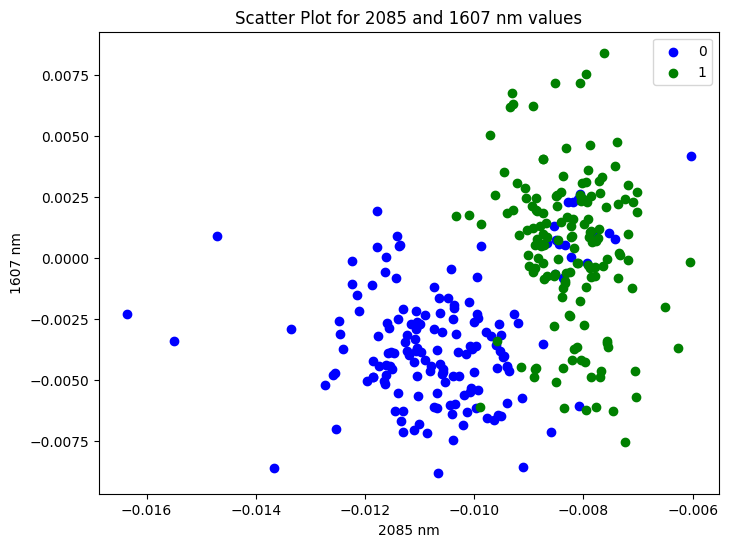

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

color_ranges = [(0, 159), (159, 308)]
colors = ['blue', 'green']

for j, (start, end) in enumerate(color_ranges):
    plt.scatter(
        val_2085[start:end+1],
        val_1607[start:end+1],
        c=colors[j],
        label=str(j)
    )

plt.xlabel('2085 nm')
plt.ylabel('1607 nm')
plt.title('Scatter Plot for 2085 and 1607 nm values')

plt.legend()

plt.show()


In [56]:
from sklearn.svm import SVC
X, X_test, y, y_test = train_test_split(dla_svm_DT.iloc[:, :2], dla_svm_DT.iloc[:, 2:3], shuffle=True, random_state=7, test_size=0.2)
svm = SVC(kernel='rbf', C=100, gamma=100, probability=True, random_state=42)
svm.fit(X, y)

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=100, probability=True, random_state=42)

C:\Users\User\miniconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


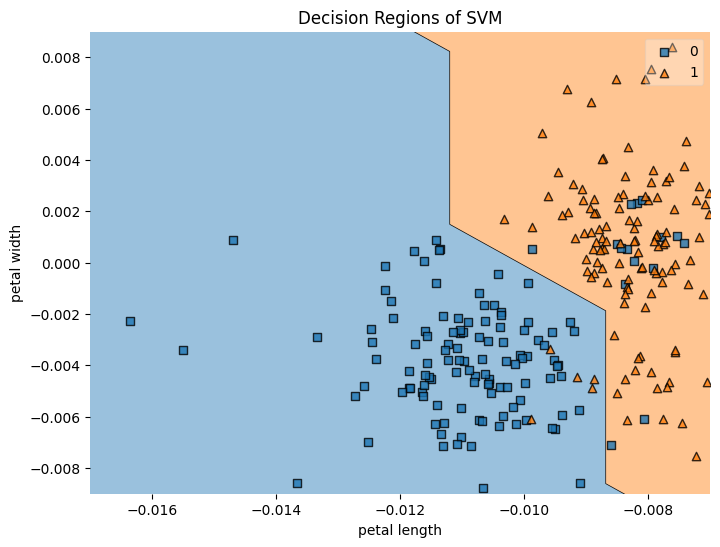

In [57]:
plt.figure(figsize=(8, 6))
from mlxtend.plotting import plot_decision_regions
# Assuming X and y are your Pandas DataFrame and Series, respectively
X_np = X.to_numpy()  # Convert X to NumPy array
y_np = y.to_numpy().flatten()  # Convert y to NumPy array

plot_decision_regions(X=X_np, y=y_np, clf=svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Decision Regions of SVM')

plt.xlim(-0.017, -0.007)  # Set x-axis limits
plt.ylim(-0.009, 0.009)  # Set y-axis limits

plt.show()

In [58]:
from sklearn.metrics import classification_report
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        31
           1       0.86      0.97      0.91        31

    accuracy                           0.90        62
   macro avg       0.91      0.90      0.90        62
weighted avg       0.91      0.90      0.90        62



In [59]:
all_important = healthy_covid_suspected.iloc[0:309, [879, 572, 754, 292, 182, 898, 289, 881, 370, 277, 624, 893, 900]]
all_important

,2085,1607,1904,1067,828,2111,1061,2088,1227,1036,1696,2104,class
0,-0.010341,-0.003095,-0.027417,0.005802,0.019812,0.001292,0.008457,-0.010946,-0.016104,0.057084,-0.009428,0.000679,0
1,-0.010634,-0.002267,-0.024166,0.004486,0.029181,-0.000512,0.007142,-0.012489,-0.012059,0.066372,-0.008007,0.000409,0
2,-0.011070,-0.002885,-0.027170,0.006673,0.015001,0.000639,0.008187,-0.011766,-0.013853,0.053816,-0.008684,0.000890,0
3,-0.011405,-0.002474,-0.031932,0.007524,-0.016823,0.000638,0.010090,-0.011703,-0.006562,0.043323,-0.005524,0.000436,0
4,-0.012244,-0.001051,-0.030163,0.008006,-0.013772,0.000104,0.009016,-0.013272,-0.003598,0.041283,-0.004390,-0.000010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-0.008746,0.000976,-0.024105,0.001095,0.015013,-0.000266,0.008141,-0.009921,-0.016699,0.064064,-0.009427,0.000845,1
305,-0.007667,0.003329,-0.022207,0.004573,0.027747,0.000667,0.008618,-0.010365,-0.012975,0.077528,-0.005880,0.000723,1
306,-0.007921,0.001588,-0.026033,0.004184,0.004708,0.001375,0.006422,-0.009999,-0.013048,0.050891,-0.007661,0.000910,1
307,-0.008507,0.002561,-0.026758,0.004369,0.005857,0.000957,0.006668,-0.009636,-0.014577,0.052168,-0.009362,0.001087,1


In [60]:
from sklearn.svm import SVC
X, X_test, y, y_test = train_test_split(all_important.iloc[:, :12], all_important.iloc[:, 12:13], shuffle=True, random_state=7, test_size=0.2)
svm = SVC(kernel='linear', C=1000, probability=True, random_state=42)
svm.fit(X, y)

C:\Users\User\miniconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1000, kernel='linear', probability=True, random_state=42)

In [61]:
from sklearn.metrics import classification_report
y_pred=svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.89      1.00      0.94        31

    accuracy                           0.94        62
   macro avg       0.94      0.94      0.94        62
weighted avg       0.94      0.94      0.94        62



Accuracy: 0.9354838709677419
Confusion Matrix:
 [[27  4]
 [ 0 31]]


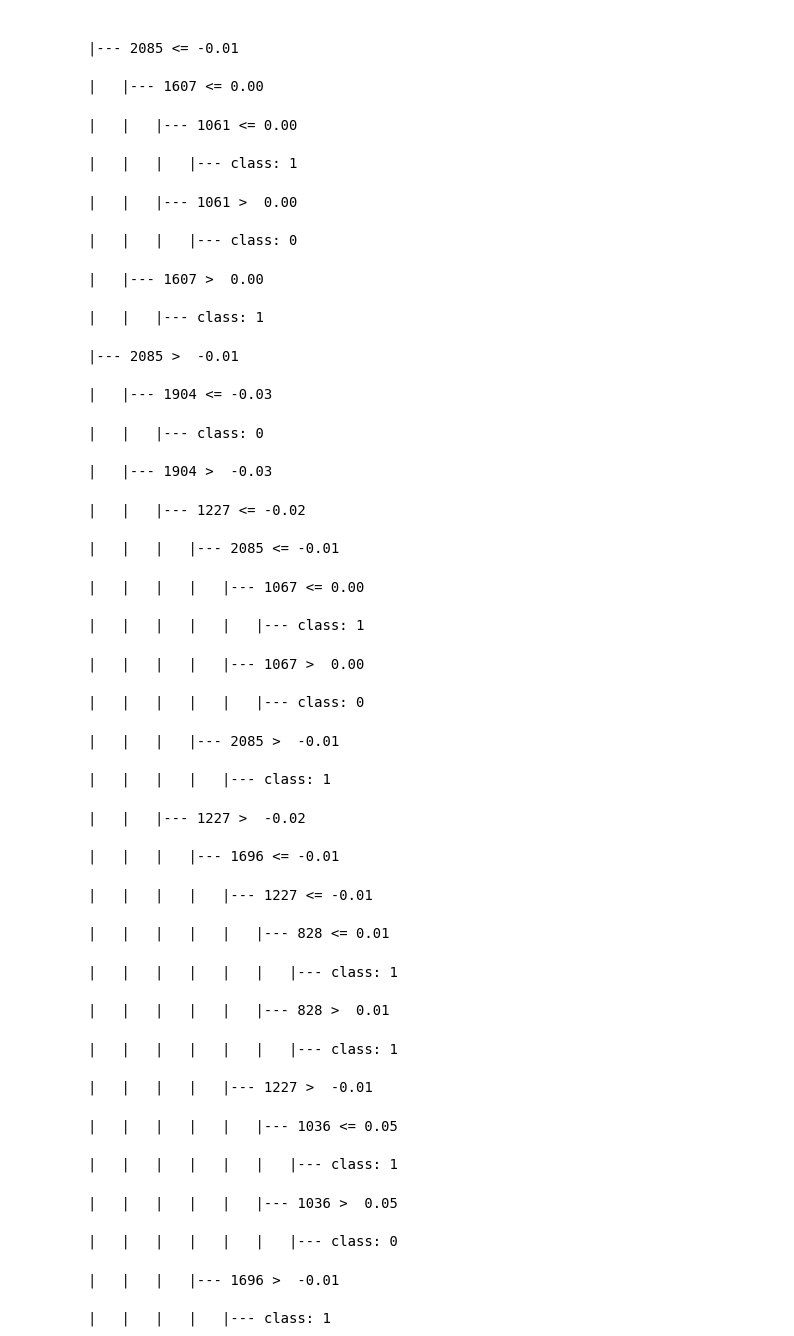

In [62]:
X_train, X_test, y_train, y_test = train_test_split(all_important.iloc[:, :12], all_important.iloc[:, 12:13], shuffle=True, random_state=7, test_size=0.2)
dt_classifier = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth = 6)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

tree_rules = export_text(dt_classifier, feature_names=list(X_train.columns))
rules_lines = tree_rules.split('\n')

fig, ax = plt.subplots(figsize=(10, 5))
for i, line in enumerate(rules_lines):
    ax.text(0.1, 0.9 - i * 0.1, line, fontsize=10, va='center', ha='left', fontfamily='monospace')

ax.axis('off')
plt.show()

In [ ]:
Zastosowano Algorytm AWLS do wygładzania danych:

In [73]:
#wygładzanie danych covid
np.random.seed(42)
df = covid.iloc[:, :-1]

smoothed_covid = pd.DataFrame(index=df.index)

for col in df.columns:
    y = df[col].values
    lowess = sm.nonparametric.lowess(y, df.index, frac=0.3, it=3)
    smoothed_covid[col] = lowess[:, 1]

smoothed_covid

C:\Users\User\AppData\Local\Temp\ipykernel_20308\2199875234.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  smoothed_covid[col] = lowess[:, 1]


,400,402,405,407,410,412,415,417,420,422,...,2100,2101,2103,2104,2105,2107,2108,2109,2111,2112
0,0.0,-0.015735,-0.025933,-0.027753,-0.027687,-0.024803,-0.022367,-0.023893,-0.023062,-0.020422,...,-0.001971,-0.000969,-0.000185,0.000621,0.001006,0.001180,0.000981,0.000786,0.000625,0.0
1,0.0,-0.015727,-0.025895,-0.027723,-0.027655,-0.024748,-0.022302,-0.023789,-0.023021,-0.020418,...,-0.001967,-0.000960,-0.000177,0.000628,0.001014,0.001197,0.000999,0.000793,0.000626,0.0
2,0.0,-0.015716,-0.025854,-0.027689,-0.027619,-0.024688,-0.022231,-0.023680,-0.022975,-0.020409,...,-0.001963,-0.000951,-0.000169,0.000635,0.001023,0.001213,0.001017,0.000799,0.000627,0.0
3,0.0,-0.015703,-0.025808,-0.027650,-0.027576,-0.024624,-0.022155,-0.023566,-0.022923,-0.020394,...,-0.001959,-0.000943,-0.000162,0.000641,0.001031,0.001228,0.001034,0.000806,0.000628,0.0
4,0.0,-0.015686,-0.025759,-0.027607,-0.027528,-0.024554,-0.022074,-0.023446,-0.022864,-0.020372,...,-0.001956,-0.000936,-0.000156,0.000647,0.001039,0.001243,0.001051,0.000811,0.000628,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,-0.013459,-0.018419,-0.017733,-0.016295,-0.017611,-0.019276,-0.019297,-0.017520,-0.015243,...,-0.001324,-0.000596,0.000034,0.000611,0.000773,0.001173,0.001314,0.000654,0.000340,0.0
155,0.0,-0.013461,-0.018189,-0.017378,-0.015901,-0.017261,-0.019085,-0.019139,-0.017278,-0.014927,...,-0.001277,-0.000575,0.000037,0.000609,0.000772,0.001178,0.001328,0.000661,0.000342,0.0
156,0.0,-0.013465,-0.017966,-0.017033,-0.015520,-0.016923,-0.018904,-0.018990,-0.017048,-0.014623,...,-0.001229,-0.000554,0.000040,0.000607,0.000771,0.001183,0.001343,0.000669,0.000344,0.0
157,0.0,-0.013470,-0.017749,-0.016699,-0.015152,-0.016595,-0.018733,-0.018852,-0.016829,-0.014330,...,-0.001180,-0.000533,0.000044,0.000606,0.000771,0.001189,0.001358,0.000678,0.000346,0.0


In [74]:
#wygładzanie danych healthy
np.random.seed(42)
df = healthy.iloc[:, :-1]

smoothed_healthy = pd.DataFrame(index=df.index)

for col in df.columns:
    y = df[col].values
    lowess = sm.nonparametric.lowess(y, df.index, frac=0.3, it=3)
    smoothed_healthy[col] = lowess[:, 1]

C:\Users\User\AppData\Local\Temp\ipykernel_20308\3817798803.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  smoothed_healthy[col] = lowess[:, 1]


In [75]:
#wygładzanie danych suspected
np.random.seed(42)
df = suspected.iloc[:, :-1]

smoothed_suspected = pd.DataFrame(index=df.index)

for col in df.columns:
    y = df[col].values
    lowess = sm.nonparametric.lowess(y, df.index, frac=0.3, it=3)
    smoothed_suspected[col] = lowess[:, 1]

C:\Users\User\AppData\Local\Temp\ipykernel_20308\865004468.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  smoothed_suspected[col] = lowess[:, 1]


In [76]:
smoothed_covid_mean=smoothed_covid.mean(axis=0)
smoothed_healthy_mean=smoothed_healthy.mean(axis=0)
smoothed_suspected_mean=smoothed_suspected.mean(axis=0)

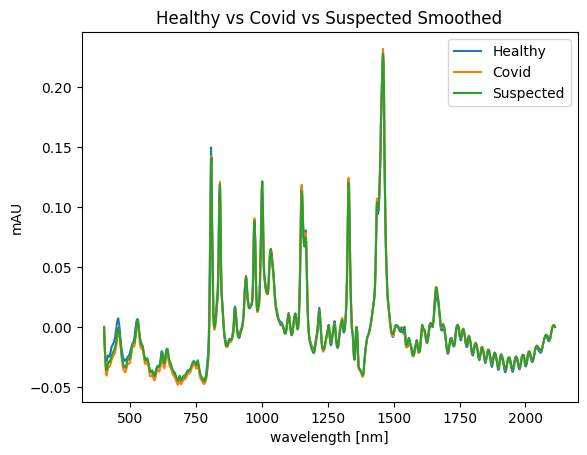

In [108]:
df = pd.read_csv('wave_number.txt', sep="\t", header=None)
x = df.iloc[0].T.values
plt.plot(x, smoothed_covid_mean, label='Healthy')
plt.plot(x, smoothed_healthy_mean, label='Covid')
plt.plot(x, smoothed_suspected_mean, label='Suspected')

plt.legend()

plt.title("Healthy vs Covid vs Suspected Smoothed")
plt.xlabel("wavelength [nm]")
plt.ylabel("mAU")

plt.show()

In [78]:
label_covid=[0]*159
smoothed_covid["class"]=label_covid
label_healthy = [1]*150
smoothed_healthy["class"]=label_healthy
label_suspected = [2]*156
smoothed_suspected["class"]=label_suspected

C:\Users\User\AppData\Local\Temp\ipykernel_20308\2029938681.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  smoothed_covid["class"]=label_covid
C:\Users\User\AppData\Local\Temp\ipykernel_20308\2029938681.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  smoothed_healthy["class"]=label_healthy
C:\Users\User\AppData\Local\Temp\ipykernel_20308\2029938681.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [79]:
smoothed_healthy_covid=pd.concat([smoothed_covid, smoothed_healthy], ignore_index=True)
smoothed_suspected_covid=pd.concat([smoothed_covid, smoothed_suspected], ignore_index=True)
smoothed_healthy_suspected=pd.concat([smoothed_suspected, smoothed_healthy], ignore_index=True)
smoothed_all=pd.concat([smoothed_suspected, smoothed_healthy, smoothed_covid], ignore_index=True)

In [109]:
smoothed_healthy_covid.columns = smoothed_healthy_covid.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(smoothed_healthy_covid.iloc[:, :-1], smoothed_healthy_covid.iloc[:, -1], test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=6)

dt_classifier.fit(X_train, y_train)

feature_importances = dt_classifier.feature_importances_

indices = feature_importances.argsort()[::-1]

print("Feature rankings for healthy and covid:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]} {indices[f]}: {feature_importances[indices[f]]}")


Feature rankings for healthy and covid:
1898 750: 1.0
2112 899: 0.0
1156 335: 0.0
1094 305: 0.0
1092 304: 0.0
1090 303: 0.0
1088 302: 0.0
1086 301: 0.0
1084 300: 0.0
1082 299: 0.0
1080 298: 0.0
1078 297: 0.0
1076 296: 0.0
1074 295: 0.0
1071 294: 0.0
1069 293: 0.0
1067 292: 0.0
1065 291: 0.0
1063 290: 0.0
1061 289: 0.0
1059 288: 0.0
1057 287: 0.0
1055 286: 0.0
1052 285: 0.0
1050 284: 0.0
1048 283: 0.0
1046 282: 0.0
1097 306: 0.0
1099 307: 0.0
1101 308: 0.0
1130 322: 0.0
1152 333: 0.0
1150 332: 0.0
1148 331: 0.0
1146 330: 0.0
1144 329: 0.0
1142 328: 0.0
1140 327: 0.0
1138 326: 0.0
1136 325: 0.0
1134 324: 0.0
1132 323: 0.0
1128 321: 0.0
1103 309: 0.0
1126 320: 0.0
1124 319: 0.0
1121 318: 0.0
1119 317: 0.0
1117 316: 0.0
1115 315: 0.0
1113 314: 0.0
1111 313: 0.0
1109 312: 0.0
1107 311: 0.0
1105 310: 0.0
1044 281: 0.0
1042 280: 0.0
1040 279: 0.0
952 238: 0.0
976 249: 0.0
974 248: 0.0
971 247: 0.0
969 246: 0.0
967 245: 0.0
965 244: 0.0
963 243: 0.0
961 242: 0.0
958 241: 0.0
956 240: 0.0
954 2

In [110]:
smoothed_suspected_covid.columns = smoothed_suspected_covid.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(smoothed_suspected_covid.iloc[:, :-1], smoothed_suspected_covid.iloc[:, -1], test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=6)

dt_classifier.fit(X_train, y_train)

feature_importances = dt_classifier.feature_importances_

indices = feature_importances.argsort()[::-1]

print("Feature rankings for suspected and covid:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]} {indices[f]}: {feature_importances[indices[f]]}")

Feature rankings for suspected and covid:
1142 328: 1.0
2112 899: 0.0
1071 294: 0.0
1094 305: 0.0
1092 304: 0.0
1090 303: 0.0
1088 302: 0.0
1086 301: 0.0
1084 300: 0.0
1082 299: 0.0
1080 298: 0.0
1078 297: 0.0
1076 296: 0.0
1074 295: 0.0
1069 293: 0.0
1099 307: 0.0
1067 292: 0.0
1065 291: 0.0
1063 290: 0.0
1061 289: 0.0
1059 288: 0.0
1057 287: 0.0
1055 286: 0.0
1052 285: 0.0
1050 284: 0.0
1048 283: 0.0
1046 282: 0.0
1097 306: 0.0
1101 308: 0.0
1158 336: 0.0
1130 322: 0.0
1154 334: 0.0
1152 333: 0.0
1150 332: 0.0
1148 331: 0.0
1146 330: 0.0
1144 329: 0.0
1140 327: 0.0
1138 326: 0.0
1136 325: 0.0
1134 324: 0.0
1132 323: 0.0
1128 321: 0.0
1103 309: 0.0
1126 320: 0.0
1124 319: 0.0
1121 318: 0.0
1119 317: 0.0
1117 316: 0.0
1115 315: 0.0
1113 314: 0.0
1111 313: 0.0
1109 312: 0.0
1107 311: 0.0
1105 310: 0.0
1044 281: 0.0
1042 280: 0.0
1040 279: 0.0
952 238: 0.0
976 249: 0.0
974 248: 0.0
971 247: 0.0
969 246: 0.0
967 245: 0.0
965 244: 0.0
963 243: 0.0
961 242: 0.0
958 241: 0.0
956 240: 0.0
954

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
smoothed_healthy_suspected.columns = smoothed_healthy_suspected.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(smoothed_healthy_suspected.iloc[:, :-1], smoothed_healthy_suspected.iloc[:, -1], test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=6)

dt_classifier.fit(X_train, y_train)

feature_importances = dt_classifier.feature_importances_

indices = feature_importances.argsort()[::-1]

print("Feature rankings healthy and suspected:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]} {indices[f]}: {feature_importances[indices[f]]}")

Feature rankings healthy and suspected:
1676 612: 0.6712687077087423
1619 579: 0.2682905251236761
558 65: 0.06044076716758157
2112 899: 0.0
1074 295: 0.0
1094 305: 0.0
1092 304: 0.0
1090 303: 0.0
1088 302: 0.0
1086 301: 0.0
1084 300: 0.0
1082 299: 0.0
1080 298: 0.0
1078 297: 0.0
1076 296: 0.0
1071 294: 0.0
1099 307: 0.0
1069 293: 0.0
1067 292: 0.0
1065 291: 0.0
1063 290: 0.0
1061 289: 0.0
1059 288: 0.0
1057 287: 0.0
1055 286: 0.0
1052 285: 0.0
1050 284: 0.0
1097 306: 0.0
1101 308: 0.0
1046 282: 0.0
1130 322: 0.0
1152 333: 0.0
1150 332: 0.0
1148 331: 0.0
1146 330: 0.0
1144 329: 0.0
1142 328: 0.0
1140 327: 0.0
1138 326: 0.0
1136 325: 0.0
1134 324: 0.0
1132 323: 0.0
1128 321: 0.0
1103 309: 0.0
1126 320: 0.0
1124 319: 0.0
1121 318: 0.0
1119 317: 0.0
1117 316: 0.0
1115 315: 0.0
1113 314: 0.0
1111 313: 0.0
1109 312: 0.0
1107 311: 0.0
1105 310: 0.0
1048 283: 0.0
1044 281: 0.0
1156 335: 0.0
1042 280: 0.0
980 251: 0.0
978 250: 0.0
976 249: 0.0
974 248: 0.0
971 247: 0.0
969 246: 0.0
967 245: 0.0

In [112]:
X_train, X_test, y_train, y_test = train_test_split(smoothed_all.iloc[:, :-1], smoothed_all.iloc[:, -1], test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=6)

dt_classifier.fit(X_train, y_train)

feature_importances = dt_classifier.feature_importances_

indices = feature_importances.argsort()[::-1]

print("Feature rankings for covid, healthy and suspected:")
for f in range(X_train.shape[1]):
    print(f"{X_train.columns[indices[f]]} {indices[f]}: {feature_importances[indices[f]]}")

Feature rankings for covid, healthy and suspected:
1898 750: 0.5759628980881352
2104 893: 0.27689167485651794
1964 794: 0.14714542705534694
2112 899: 0.0
1071 294: 0.0
1092 304: 0.0
1090 303: 0.0
1088 302: 0.0
1086 301: 0.0
1084 300: 0.0
1082 299: 0.0
1080 298: 0.0
1078 297: 0.0
1076 296: 0.0
1074 295: 0.0
1067 292: 0.0
1069 293: 0.0
1097 306: 0.0
1065 291: 0.0
1063 290: 0.0
1061 289: 0.0
1059 288: 0.0
1057 287: 0.0
1055 286: 0.0
1052 285: 0.0
1050 284: 0.0
1048 283: 0.0
1046 282: 0.0
1094 305: 0.0
1101 308: 0.0
1099 307: 0.0
1128 321: 0.0
1150 332: 0.0
1148 331: 0.0
1146 330: 0.0
1144 329: 0.0
1142 328: 0.0
1140 327: 0.0
1138 326: 0.0
1136 325: 0.0
1134 324: 0.0
1132 323: 0.0
1130 322: 0.0
1126 320: 0.0
1042 280: 0.0
1124 319: 0.0
1121 318: 0.0
1119 317: 0.0
1117 316: 0.0
1115 315: 0.0
1113 314: 0.0
1111 313: 0.0
1109 312: 0.0
1107 311: 0.0
1105 310: 0.0
1103 309: 0.0
1044 281: 0.0
1040 279: 0.0
1154 334: 0.0
1038 278: 0.0
976 249: 0.0
974 248: 0.0
971 247: 0.0
969 246: 0.0
967 245: 0

Accuracy: 1.0
Confusion Matrix:
 [[32  0]
 [ 0 30]]
Confusion Matrix train:
 [[127   0]
 [  0 120]]


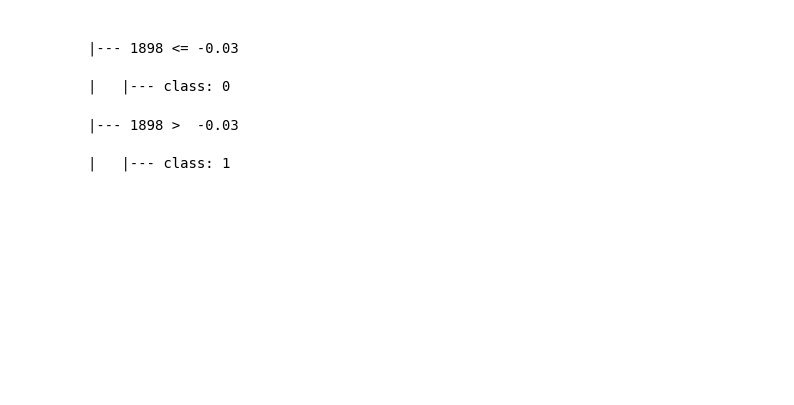

In [86]:
#drzewko decyzyjne dla kategoryzacji healthy i covid
X_train, X_test, y_train, y_test = train_test_split(smoothed_healthy_covid.iloc[:, [750, 899]], healthy_covid.iloc[:, -1], test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42, criterion = 'gini')

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Confusion Matrix train:\n", conf_matrix_train)

tree_rules = export_text(dt_classifier, feature_names=list(X_train.columns))
rules_lines = tree_rules.split('\n')

fig, ax = plt.subplots(figsize=(10, 5))
for i, line in enumerate(rules_lines):
    ax.text(0.1, 0.9 - i * 0.1, line, fontsize=10, va='center', ha='left', fontfamily='monospace')


ax.axis('off')
plt.show()

Accuracy: 1.0
Confusion Matrix:
 [[33  0]
 [ 0 30]]
Confusion Matrix train:
 [[126   0]
 [  0 126]]


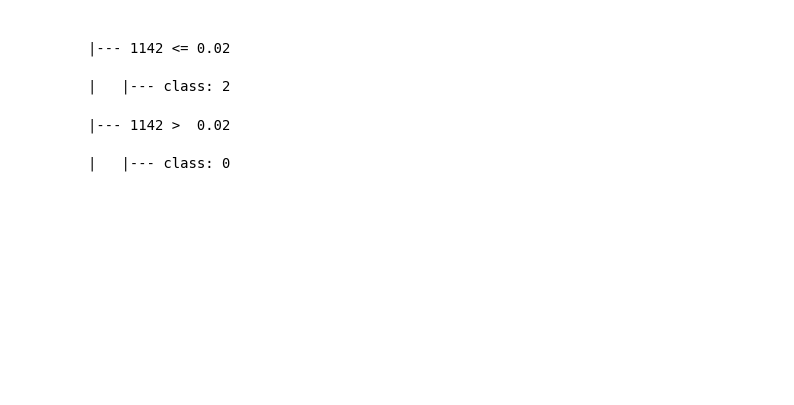

In [87]:
#drzewko decyzyjne dla kategoryzacji suspected i covid
X_train, X_test, y_train, y_test = train_test_split(smoothed_suspected_covid.iloc[:, [328, 899]], smoothed_suspected_covid.iloc[:, -1], test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth = 6)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Confusion Matrix train:\n", conf_matrix_train)

tree_rules = export_text(dt_classifier, feature_names=list(X_train.columns))
rules_lines = tree_rules.split('\n')

fig, ax = plt.subplots(figsize=(10, 5))
for i, line in enumerate(rules_lines):
    ax.text(0.1, 0.9 - i * 0.1, line, fontsize=10, va='center', ha='left', fontfamily='monospace')

ax.axis('off')
plt.show()

Accuracy: 1.0
Confusion Matrix:
 [[29  0]
 [ 0 33]]
Confusion Matrix train:
 [[121   0]
 [  0 123]]


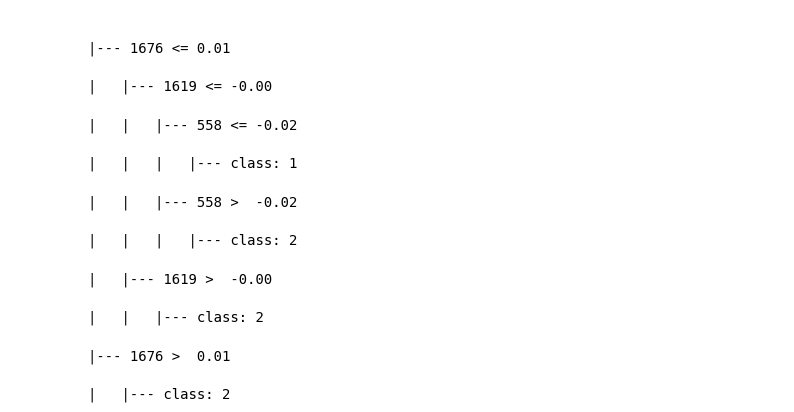

In [88]:
#drzewko decyzyjne dla kategoryzacji healthy i suspected
X_train, X_test, y_train, y_test = train_test_split(smoothed_healthy_suspected.iloc[:, [612, 579, 65]], smoothed_healthy_suspected.iloc[:, -1], test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42, criterion = 'entropy')

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Confusion Matrix train:\n", conf_matrix_train)

tree_rules = export_text(dt_classifier, feature_names=list(X_train.columns))
rules_lines = tree_rules.split('\n')

fig, ax = plt.subplots(figsize=(10, 5))
for i, line in enumerate(rules_lines):
    ax.text(0.1, 0.9 - i * 0.1, line, fontsize=10, va='center', ha='left', fontfamily='monospace')

ax.axis('off')
plt.show()

Accuracy: 1.0
Confusion Matrix:
 [[37  0  0]
 [ 0 25  0]
 [ 0  0 31]]
Confusion Matrix train:
 [[122   0   0]
 [  0 125   0]
 [  0   0 125]]


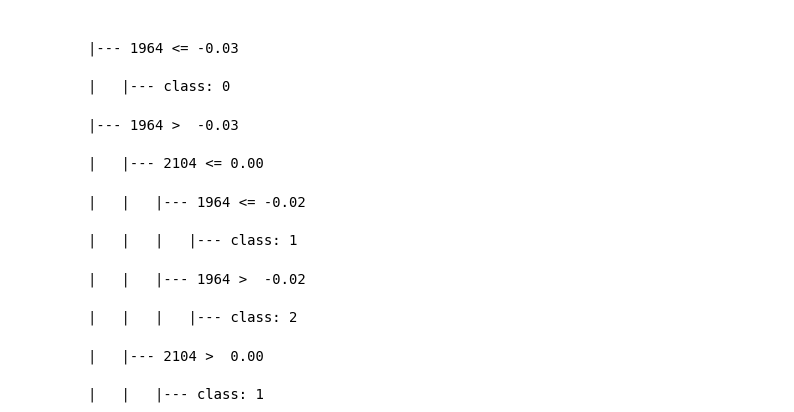

In [89]:
#drzewko decyzyjne dla kategoryzacji healthy, covid i suspected
X_train, X_test, y_train, y_test = train_test_split(smoothed_all.iloc[:, [750, 893, 794]], smoothed_all.iloc[:, -1], test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42, criterion = 'entropy')

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Confusion Matrix train:\n", conf_matrix_train)

tree_rules = export_text(dt_classifier, feature_names=list(X_train.columns))
rules_lines = tree_rules.split('\n')

fig, ax = plt.subplots(figsize=(10, 5))
for i, line in enumerate(rules_lines):
    ax.text(0.1, 0.9 - i * 0.1, line, fontsize=10, va='center', ha='left', fontfamily='monospace')

ax.axis('off')
plt.show()